# Imports

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re
import os
import numpy as np
from typing import Tuple
from collections import defaultdict

# Helper Functions

In [35]:
import math
def get_lin_interpol(ind: float, arr: np.ndarray) -> float:
    if ind.is_integer():
        return arr[int(ind)]
    else:
        lower: int = math.floor(ind)
        upper: int = math.ceil(ind)
        diff: float = arr[upper] - arr[lower]
        delta: float = diff * (ind  - math.floor(ind))
        return arr[lower] + delta

In [36]:
def steps_to_epochs(y: np.ndarray, epochs: int) -> Tuple[np.ndarray, np.ndarray]:
    n: int = len(y) - 1
    new_y: list = []
    new_x: list = list(range(0, epochs + 1))
    for i in new_x:
        new_y.append(get_lin_interpol(n / epochs * i, y))
    return np.array(new_x), np.array(new_y)


In [37]:
def plot_an_line(title: str, y: np.ndarray, figsize: tuple = (10, 5), y_lim: tuple = (0.5, 0.65)):
    x: list = list(range(len(y)))
    fig, ax = plt.subplots()
    # ax.set_title(title)
    ax.set_facecolor('#EBEBEB')
    ax.grid(which='major', color='white', linewidth=0.8)
    ax.grid(which='minor', color='white', linestyle=':', linewidth=0.5)
    ax.minorticks_on()
    ax.plot(x, y)
    ax.hlines(0.51, -0, len(x) - 1, colors="red", label="Baseline")
    ax.set_ylabel("Accuracy on oLMpics (antonym negation)")
    ax.legend(loc="upper left")
    ax.set_ylim(*y_lim)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.rcParams["figure.figsize"] = figsize

    name_file: str = re.sub(r"[^A-Za-z0-9]", "_", title) + '.jpg'
    path_save: str = os.path.join('figures', name_file)
    plt.savefig(path_save)

    plt.show()

# Filtered Training Data

In [38]:
parent_path_t1: str = "/home/philko/Documents/Uni/WiSe2223/UnsupervisedLearning/udl-negation/notebooks/logs/ng_only"

In [39]:
for file in os.listdir(parent_path_t1):
        if file.endswith(".csv"):
            print((os.path.join(parent_path_t1, file)))

/home/philko/Documents/Uni/WiSe2223/UnsupervisedLearning/udl-negation/notebooks/logs/ng_only/neg_only_run.csv
/home/philko/Documents/Uni/WiSe2223/UnsupervisedLearning/udl-negation/notebooks/logs/ng_only/neg_only_run_loss.csv


In [40]:
df_loss: pd.DataFrame = pd.read_csv(os.path.join(parent_path_t1, 'neg_only_run_loss.csv'))
df_an: pd.DataFrame = pd.read_csv(os.path.join(parent_path_t1, 'neg_only_run.csv'))

In [41]:
x_t1: np.ndarray = df_an.Step.values
y_t1: np.ndarray = df_an.loc[:,"Neg Only Experiment - MLM - FINAL - antonym-negation"].values

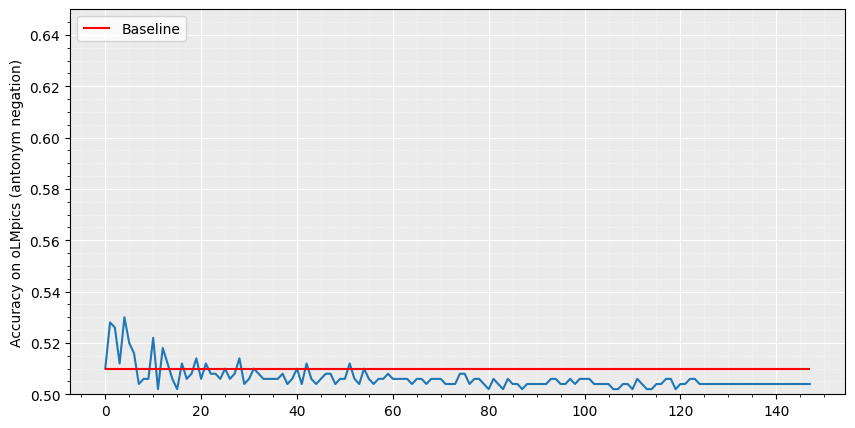

In [42]:
plot_an_line(
    "MLM-Training with Filtered Training Data",
    y_t1,
)

# Filtered Data + Supervised-Masking on WN Data

In [43]:
parent_path_t2 = "/home/philko/Documents/Uni/WiSe2223/UnsupervisedLearning/udl-negation/notebooks/logs/ng_wn_mixed"

In [44]:
for file in os.listdir(parent_path_t2):
        if file.endswith(".csv"):
            print((os.path.join(parent_path_t2, file)))

/home/philko/Documents/Uni/WiSe2223/UnsupervisedLearning/udl-negation/notebooks/logs/ng_wn_mixed/ng_wn_sp.csv
/home/philko/Documents/Uni/WiSe2223/UnsupervisedLearning/udl-negation/notebooks/logs/ng_wn_mixed/ng_wn_sp_loss.csv


In [45]:
df_loss: pd.DataFrame = pd.read_csv(os.path.join(parent_path_t2, 'ng_wn_sp_loss.csv'))
df_an: pd.DataFrame = pd.read_csv(os.path.join(parent_path_t2, 'ng_wn_sp.csv'))

In [46]:
x_t2: np.ndarray = df_an.Step.values
y_t2: np.ndarray = df_an.loc[:,"Mixed Experiment - FINAL - antonym-negation"].values

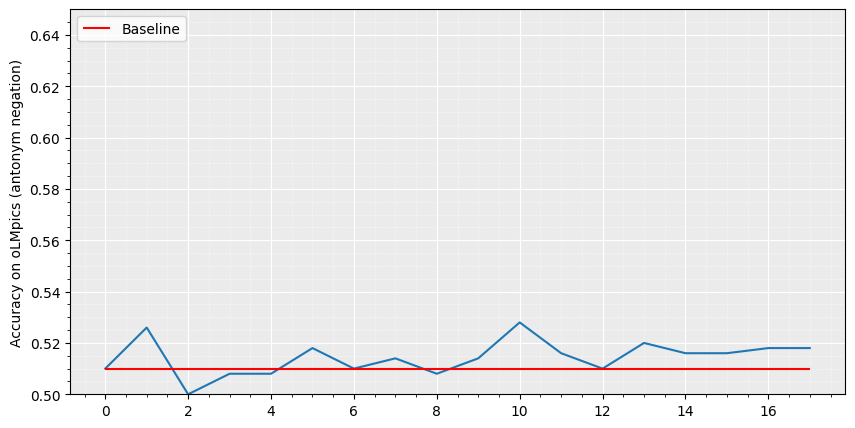

In [47]:
plot_an_line("Training with Filtered Data (MLM) + WN-Data (Supervised Masking)", y_t2)

# Filtered Data + WN Data (MLM)

In [48]:
parent_path_t3 = "/home/philko/Documents/Uni/WiSe2223/UnsupervisedLearning/udl-negation/notebooks/logs/ng_wn_mlm_mixed"

In [49]:
for file in os.listdir(parent_path_t3):
        if file.endswith(".csv"):
            print((os.path.join(parent_path_t3, file)))

/home/philko/Documents/Uni/WiSe2223/UnsupervisedLearning/udl-negation/notebooks/logs/ng_wn_mlm_mixed/ng_wn_mixed_mlm.csv


In [50]:
df: pd.DataFrame = pd.read_csv(os.path.join(parent_path_t3, "ng_wn_mixed_mlm.csv"))

In [51]:
x_t3 = df.Step.values

In [52]:
y_iii_t3 = df['MLM / Mixed Experiment / IV - antonym-negation'].values

In [53]:
y_ii_t3 = df['MLM / Mixed Experiment / II - antonym-negation'].values

In [54]:
y_i_t3 = df['MLM / Mixed Experiment / III - antonym-negation'].values

In [55]:
y_mean_t3 = (y_i_t3 + y_ii_t3 + y_iii_t3) / 3

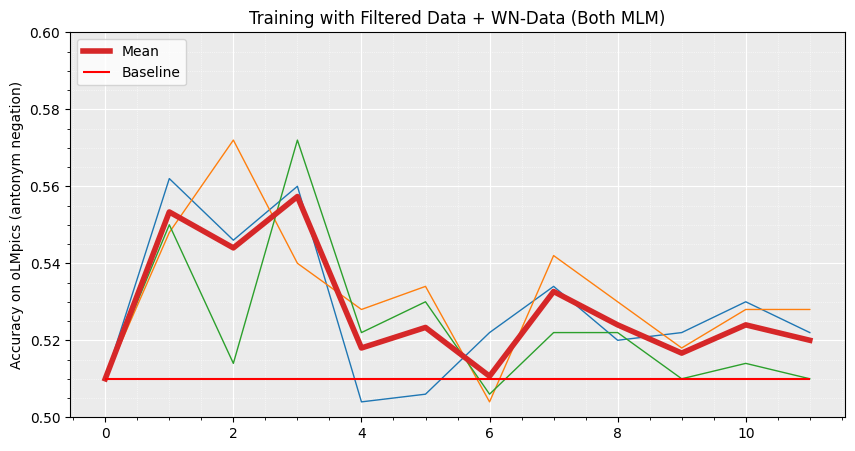

In [56]:
fig, ax = plt.subplots()
ax.set_title("Training with Filtered Data + WN-Data (Both MLM)")
ax.set_facecolor('#EBEBEB')
ax.grid(which='major', color='white', linewidth=0.8)
ax.grid(which='minor', color='white', linestyle=':', linewidth=0.5)
ax.minorticks_on()
ax.plot(x_t3, y_i_t3, linewidth=1)
ax.plot(x_t3, y_ii_t3, linewidth=1)
ax.plot(x_t3, y_iii_t3, linewidth=1)
ax.plot(x_t3, y_mean_t3, linewidth=4, label="Mean")
ax.hlines(0.51, -0, len(x_t3) - 1, colors="red", label="Baseline")
ax.set_ylabel("Accuracy on oLMpics (antonym negation)")
ax.set_ylim(0.5, 0.6)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.legend(loc="upper left")
plt.rcParams["figure.figsize"] = (10,5)
name_file: str = "FiltWNMixed.jpg"
path_save: str = os.path.join('figures', name_file)
plt.savefig(path_save)

plt.show()

# Large Experiment

In [57]:
parent_path_large = "/home/philko/Documents/Uni/WiSe2223/UnsupervisedLearning/udl-negation/notebooks/logs/ng_wn_mlm_mixed_large"

In [58]:
for file in os.listdir(parent_path_large):
        if file.endswith(".csv"):
            print((os.path.join(parent_path_large, file)))

/home/philko/Documents/Uni/WiSe2223/UnsupervisedLearning/udl-negation/notebooks/logs/ng_wn_mlm_mixed_large/ng_wn_ml_mixed_large.csv


In [59]:
df_an: pd.DataFrame = pd.read_csv(os.path.join(parent_path_large, 'ng_wn_ml_mixed_large.csv'))

In [60]:
x_large: np.ndarray = df_an.Step.values
y_large: np.ndarray = df_an.loc[:,"MLM / Mixed Experiment / Large - antonym-negation"].values ####

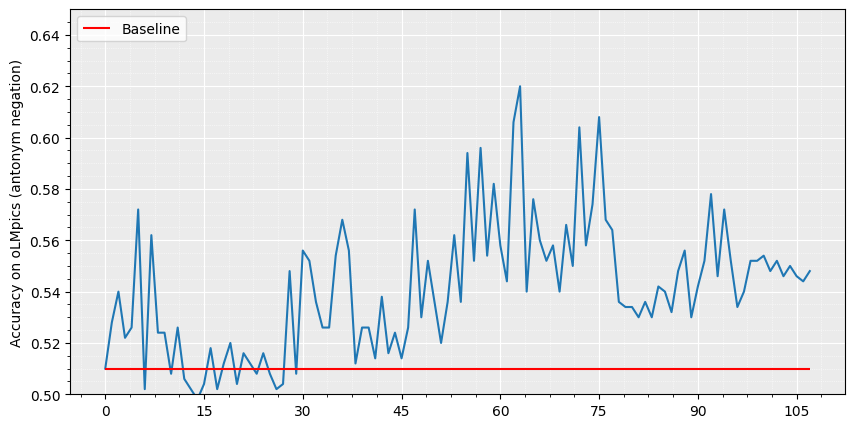

In [61]:
plot_an_line("Large Training with Filtered Data + WN-Data (Both MLM)", y_large, y_lim=(0.5, 0.65))

# Normalized for Epochs

In [62]:
x, y_mean_e = steps_to_epochs(y_mean_t3, 3)
_, y_t2_e = steps_to_epochs(y_t2, 3)
_, y_t1_e = steps_to_epochs(y_t1, 3)
_, y_large_e = steps_to_epochs(y_large, 3)

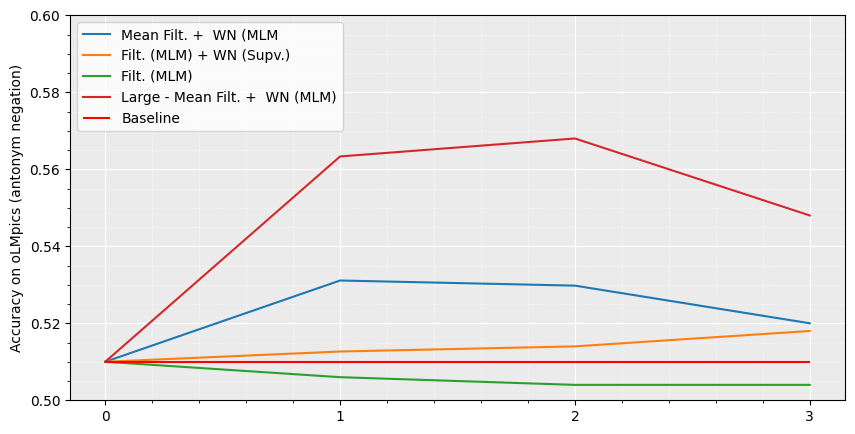

In [63]:
fig, ax = plt.subplots()
# ax.set_title("Training with Filtered Data + WN-Data (Both MLM)")
ax.set_facecolor('#EBEBEB')
ax.grid(which='major', color='white', linewidth=0.8)
ax.grid(which='minor', color='white', linestyle=':', linewidth=0.5)
ax.minorticks_on()
ax.plot(x, y_mean_e, linewidth=1.5, label="Mean Filt. +  WN (MLM)")
ax.plot(x, y_t2_e, linewidth=1.5, label="Filt. (MLM) + WN (Supv.)")
ax.plot(x, y_t1_e, linewidth=1.5, label="Filt. (MLM)")
ax.plot(x, y_large_e, linewidth=1.5, label="Large - Mean Filt. +  WN (MLM)")
ax.hlines(0.51, -0, len(x) - 1, colors="red", label="Baseline")
ax.set_ylabel("Accuracy on oLMpics (antonym negation)")
ax.set_ylim(0.5, 0.6)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.legend(loc="upper left")
plt.rcParams["figure.figsize"] = (10,5)
name_file: str = "EpochsNormAll.jpg"
path_save: str = os.path.join('figures', name_file)
plt.savefig(path_save)